# House Pricing - EDA

## Overview

This dataset is the basis for our prediction of house prices.To summarize data.

### Summary


Number of features: 80  

Label: `SalePrice`

Types of data:
  - **Numeric:** `LotArea`, `GarageArea`, `GrLivArea`, ...
  - **Categorical:** `RoofStyle`, `HouseStyle`, `SaleCondition`, ...

---

### Feature Group Summary

- **Land and Lot Information**
  - `LotArea`, `LotFrontage`, `LotShape`, `LandContour`, `Neighborhood`
  - Description: Details about lot size, shape, and location.

- **Building and Design**
  - `BldgType`, `HouseStyle`, `OverallQual`, `OverallCond`, `YearBuilt`, `YearRemodAdd`
  - Description: Type and style of the house, overall quality, and construction/remodel year.

- **Exterior and Materials**
  - `RoofStyle`, `Exterior1st`, `MasVnrType`, `ExterQual`, `Foundation`
  - Description: Roof type, exterior materials, and foundation quality.

- **Basement**
  - `BsmtQual`, `BsmtFinSF1`, `BsmtExposure`, `TotalBsmtSF`
  - Description: Basement size, finish type, and quality.

- **Living Area**
  - `1stFlrSF`, `2ndFlrSF`, `GrLivArea`, `TotRmsAbvGrd`
  - Description: Total living area and number of rooms above ground.

- **Bathrooms and Kitchen**
  - `FullBath`, `HalfBath`, `KitchenQual`, `BsmtFullBath`
  - Description: Number and quality of bathrooms and kitchens.

- **Garage and Other Features**
  - `GarageCars`, `GarageArea`, `Fireplaces`, `PoolArea`, `Fence`
  - Description: Garage capacity, number of fireplaces, and details about the pool and fence.

- **Sale Information**
  - `MoSold`, `YrSold`, `SaleType`, `SaleCondition`
  - Description: Month and year sold, sale type, and sale condition.

---

**Note:** You can read the detailed data description in the folder `"data/raw/data_description.txt"`.


<img src="image/HS_illustration.jpg" width="800">

## Preparation

### Import needed libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [11]:
data_dir = join('..', '..', 'data')
input_dir = join(data_dir, 'raw')

train = pd.read_csv(join(input_dir, 'train.csv'))
test = pd.read_csv(join(input_dir, 'test.csv'))

df_train = train.copy()
df_test = test.copy()

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

For now, we will drop ID column as it's unnecessary

In [4]:
df_train = df_train.drop(['Id'], axis=1)
df_test = df_test.drop(['Id'], axis=1)

## Univariate

### Detecting missing value

In [5]:
print(df_train.isnull().sum()[df_train.isnull().sum() > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [6]:
print(df_test.isnull().sum()[df_test.isnull().sum() > 0])

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


### Numerical distribution

In [7]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
df_num.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Based on the output, we can see that there are 38 numeric features, that being said there'll have 43 categorical features. Also, some features are high-skewed. More analysis will be done to figure it more.

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

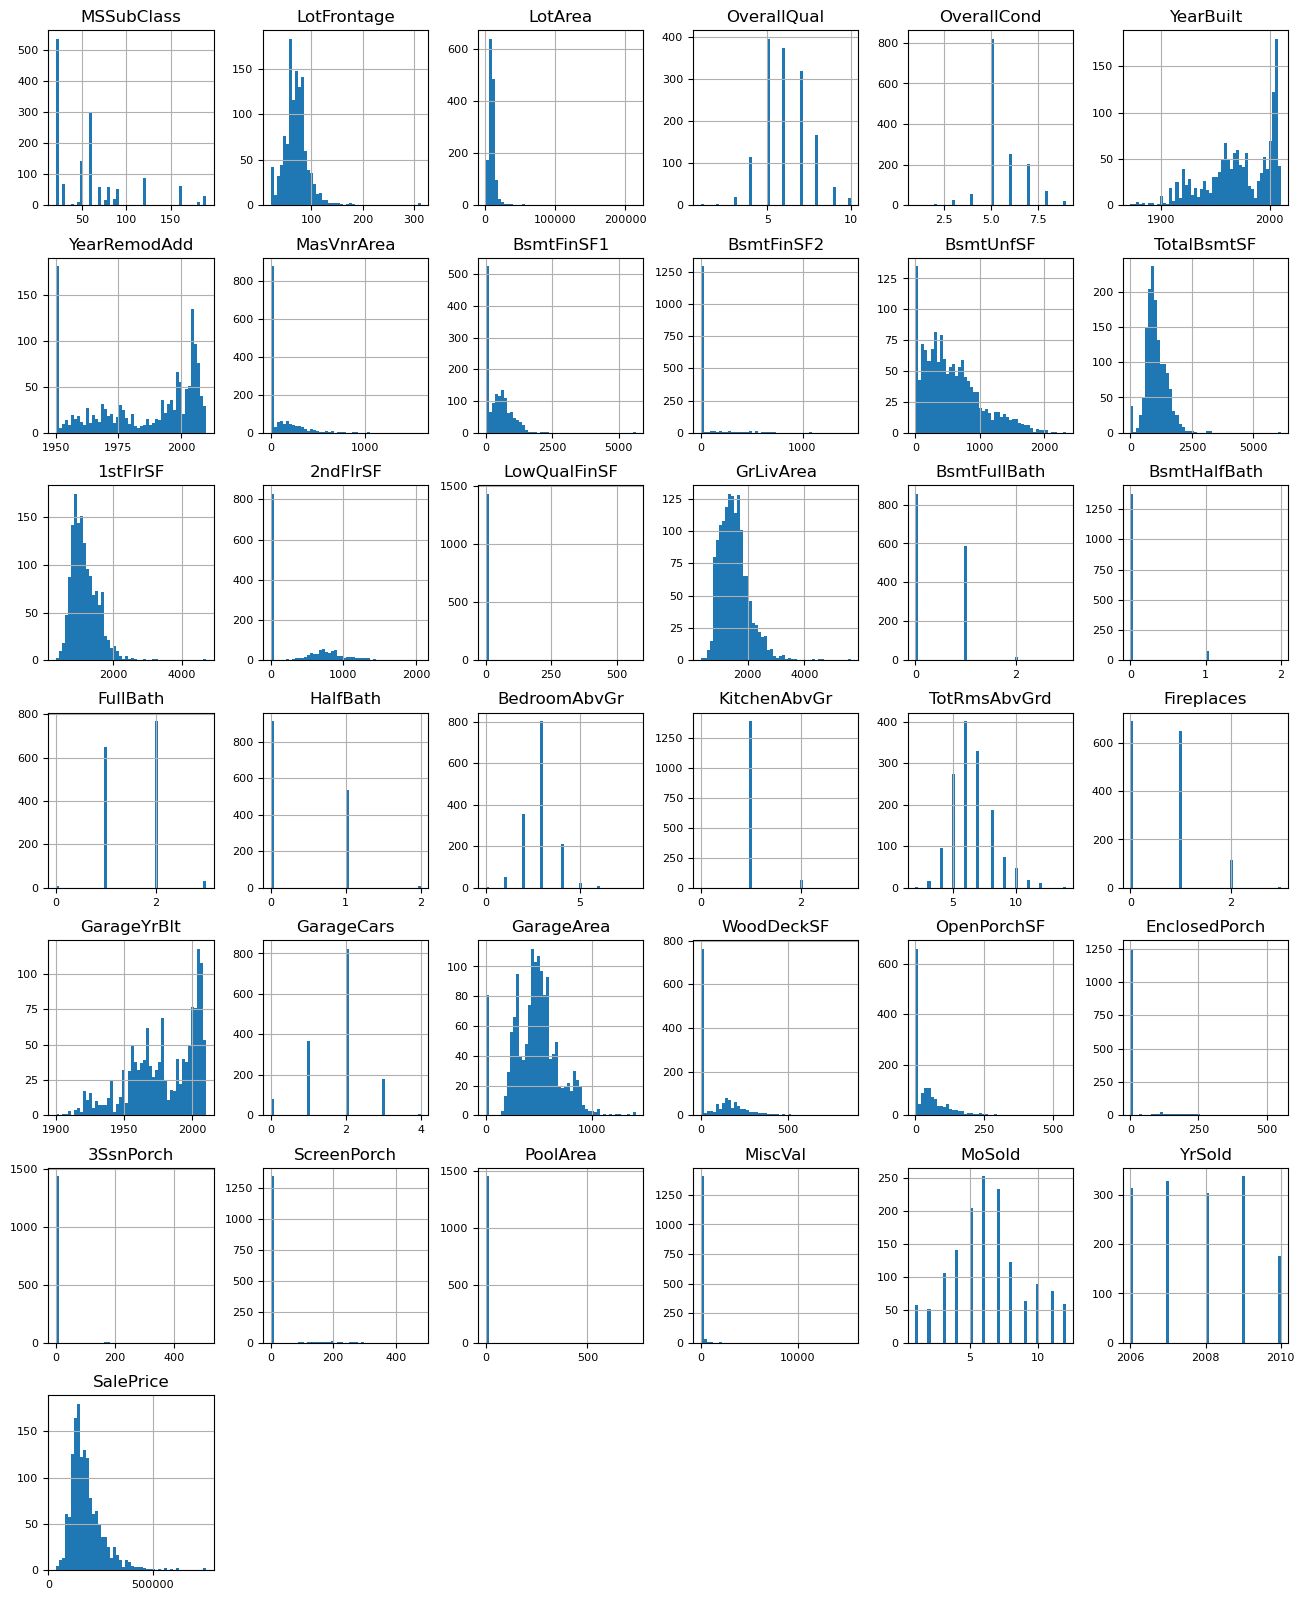

In [8]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Look at the graph, we can see that although there are numeric features, but the unique values are so little that I thought there are categorical features.
- **MSSubClass**: Identifies the type of dwelling involved in the sale.
- **OverallQual**: Rates the overall material and finish of the house
- **OverallCond**: Rates the overall condition of the house
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half baths above grade
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Fireplaces**: Number of fireplaces
- **GarageCars**: Size of garage in car capacity
- **MoSold**: Month Sold (MM)
- **YrSold**: Year Sold (YYYY)

List of features that does not include in the description file:
- **BedroomAbvGr**
- **KitchenAbvGr**

To make sure that these features are really categorical, we analyze unique values of these features

In [9]:
df_train[['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'BedroomAbvGr', 'KitchenAbvGr']].nunique()

MSSubClass      15
OverallQual     10
OverallCond      9
BsmtFullBath     4
BsmtHalfBath     3
FullBath         4
HalfBath         3
TotRmsAbvGrd    12
Fireplaces       4
GarageCars       5
MoSold          12
YrSold           5
BedroomAbvGr     8
KitchenAbvGr     4
dtype: int64

Base on the given description file, we've detected these features as categorical (for sure):
- MSSubClass
- OverallQual
- OverallCond

As for the rest, we will leave that as it is, the main model we will train is regression models, which could be beneficial by numeric features.


### Detecting outlier values

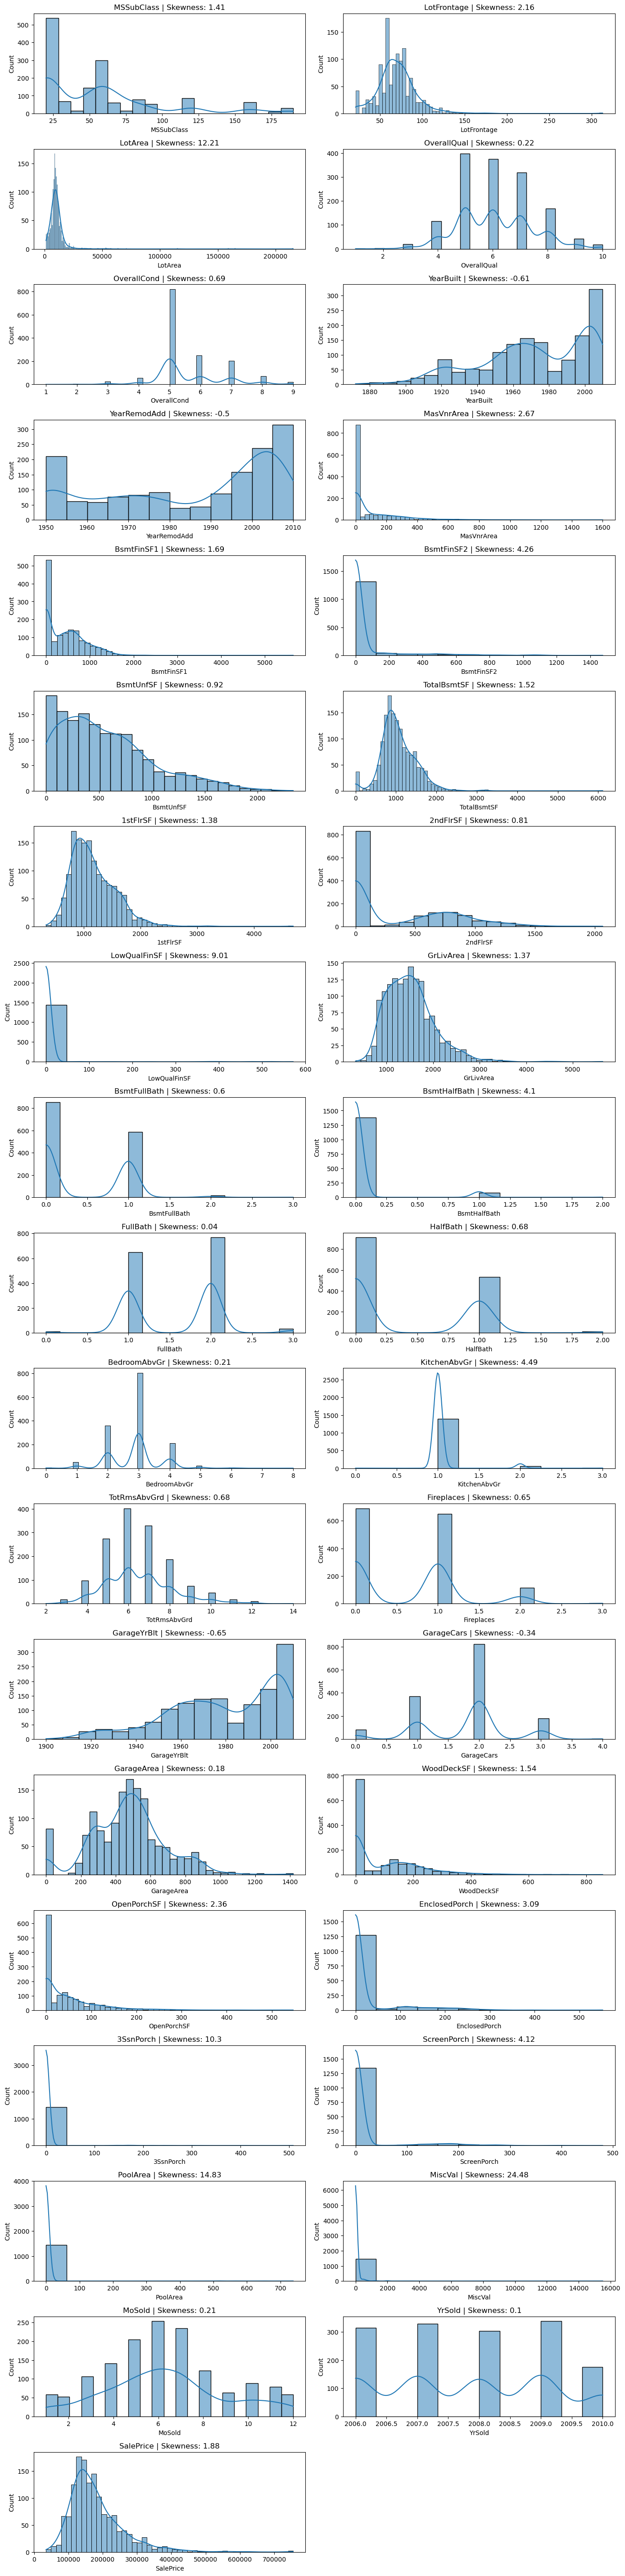

In [10]:
numerical_columns = df_train.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df_train[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df_train[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

Usually, skewness in range (-2, 2) are acceptable. Based on that condition, here's features that are high-skewed:

- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- MasVnrArea: Masonry veneer area in square feet
- BsmtFinSF2: Type 2 finished square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- BsmtHalfBath: Basement half bathrooms
- KitchenAbvGr
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- MiscVal: $Value of miscellaneous feature